## **Importing Libraries and Loading Dataset**

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the dataset
plastic_pollution_data = pd.read_csv("/content/Plastic Waste Around the World.csv")

In [3]:
# View top 5 rows of the dataset
plastic_pollution_data.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


## **Inspection of the Dataset Structure**

In [6]:
# Dataset Preparation
# Inspect the dataset
def inspect_dataset(data):
    """
    Function to inspect the initial rows, data types, and summary statistics of the dataset.
    Args:
    data (pd.DataFrame): The dataset to inspect.
    """
    print("First five rows of the dataset:\n", data.head())
    print("\nDataset Info:\n")
    print(data.info())
    print("\nDataset Description:\n", data.describe())

In [7]:
inspect_dataset(plastic_pollution_data)

First five rows of the dataset:
          Country  Total_Plastic_Waste_MT           Main_Sources  \
0          China                   59.08   Packaging_Industrial   
1  United States                   42.02     Packaging_Consumer   
2          India                   26.33         Consumer_Goods   
3          Japan                    7.99  Packaging_Electronics   
4        Germany                    6.28   Automotive_Packaging   

   Recycling_Rate  Per_Capita_Waste_KG Coastal_Waste_Risk  
0            29.8                 41.2               High  
1            32.1                127.5             Medium  
2            11.5                 19.3               High  
3            84.8                 63.2             Medium  
4            56.1                 75.6                Low  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --

## **Data Cleaning Operations**

In [8]:
# Clean Dataset
# Check for missing values and duplicates
def clean_dataset(data):
    """
    Cleans the dataset by checking and handling missing values and duplicates.
    Args:
    data (pd.DataFrame): The dataset to clean.
    """
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nDuplicate Rows:", data.duplicated().sum())

    # Dropping duplicates if any
    data.drop_duplicates(inplace=True)

    # Filling or handling missing values (if any)
    data.fillna(method='ffill', inplace=True)

    return data

In [9]:
plastic_pollution_data = clean_dataset(plastic_pollution_data)


Missing Values:
 Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

Duplicate Rows: 0


<ipython-input-8-ec5e38a7311a>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


## **Exploratory Data Analysis (EDA)**

In [16]:
# Basic Summary Statistics
def basic_statistics(data):
    """
    Provides a summary of the dataset including basic statistics, correlation, and skewness.
    Args:
    data (pd.DataFrame): The dataset to analyze.
    """
    # Select only numerical columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Print summary statistics for numerical columns
    print("\nSummary Statistics:\n", numeric_data.describe())

    # Calculate and print correlation matrix for numerical columns only
    print("\nCorrelation Matrix (Numerical Columns Only):\n", numeric_data.corr())


    # Calculate and print skewness for numerical columns only
    print("\nSkewness (Numerical Columns Only):\n", numeric_data.skew())

In [17]:
basic_statistics(plastic_pollution_data)


Summary Statistics:
        Total_Plastic_Waste_MT  Recycling_Rate  Per_Capita_Waste_KG
count              165.000000      165.000000           165.000000
mean                 1.723515       13.096364           122.255152
std                  6.001944       16.687354           222.849695
min                  0.010000        0.100000             2.600000
25%                  0.120000        1.200000            17.300000
50%                  0.510000        5.400000            54.900000
75%                  1.330000       16.400000           127.500000
max                 59.080000       84.800000          1564.400000

Correlation Matrix (Numerical Columns Only):
                         Total_Plastic_Waste_MT  Recycling_Rate  \
Total_Plastic_Waste_MT                1.000000        0.212583   
Recycling_Rate                        0.212583        1.000000   
Per_Capita_Waste_KG                  -0.046235        0.298651   

                        Per_Capita_Waste_KG  
Total_Plastic_Was

In [18]:
# Categorical Graph - Bar Chart of Top 10 Countries by Plastic Waste Production
def plot_top10_waste(data):
    """
    Plots a bar chart showing the top 10 countries by plastic waste production.
    Args:
    data (pd.DataFrame): The dataset to plot.
    """
    top10 = data.nlargest(10, 'Total_Plastic_Waste_MT')
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top10, x='Country', y='Total_Plastic_Waste_MT', palette='viridis')
    plt.title('Top 10 Countries by Plastic Waste Production')
    plt.xlabel('Country')
    plt.ylabel('Total Plastic Waste (Million Metric Tons)')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-18-b997006d9b48>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country', y='Total_Plastic_Waste_MT', palette='viridis')


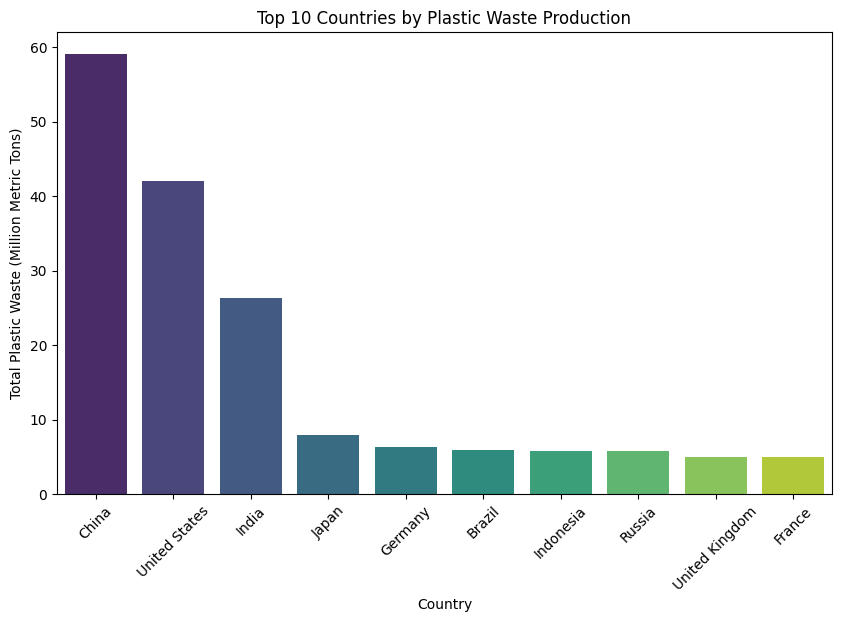

In [19]:
plot_top10_waste(plastic_pollution_data)

In [20]:
# Relational Graph - Scatter Plot of Recycling Rate vs Per Capita Waste
def plot_recycling_vs_per_capita(data):
    """
    Plots a scatter plot of recycling rates versus per capita plastic waste production.
    Args:
    data (pd.DataFrame): The dataset to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Per_Capita_Waste_KG', y='Recycling_Rate', hue='Coastal_Waste_Risk', palette='coolwarm')
    plt.title('Recycling Rate vs Per Capita Plastic Waste')
    plt.xlabel('Per Capita Waste (kg/person)')
    plt.ylabel('Recycling Rate (%)')
    plt.legend(title='Coastal Waste Risk')
    plt.show()

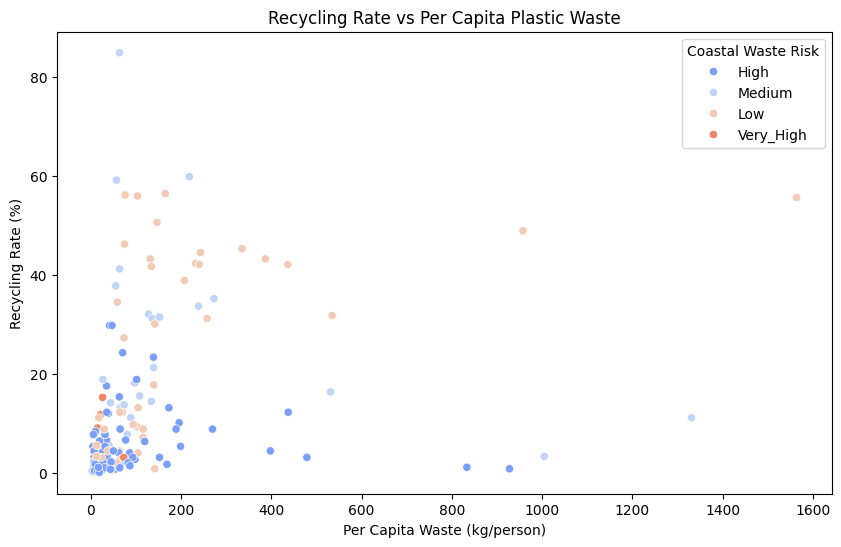

In [21]:
plot_recycling_vs_per_capita(plastic_pollution_data)

In [24]:
# Statistical Graph - Heatmap of Correlation Matrix
def plot_correlation_heatmap(data):
    """
    Plots a heatmap to visualize the correlation between numerical variables in the dataset.
    Args:
    data (pd.DataFrame): The dataset to plot.
    """
    # Select only numerical columns
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(8, 6))
    correlation = numeric_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

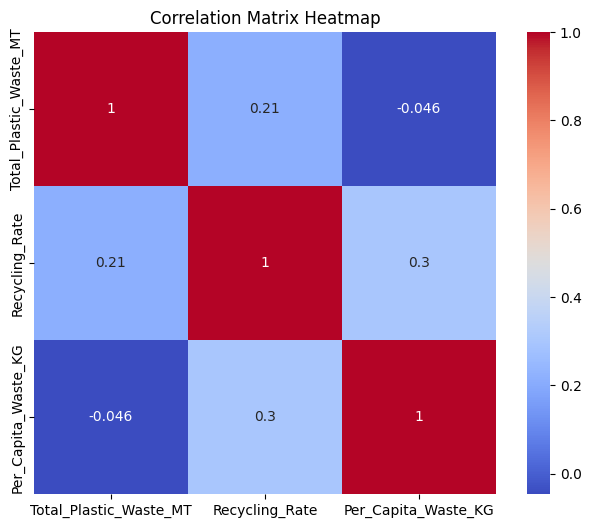

In [25]:
plot_correlation_heatmap(plastic_pollution_data)

In [28]:
# Box Plot for Per Capita Waste Production
def plot_per_capita_waste_distribution(data):
    """
    Plots a box plot to show the distribution of per capita waste production.
    Args:
    data (pd.DataFrame): The dataset to plot.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y='Per_Capita_Waste_KG', color='skyblue')
    plt.title('Distribution of Per Capita Plastic Waste Production')
    plt.ylabel('Per Capita Waste (kg/person)')
    plt.show()

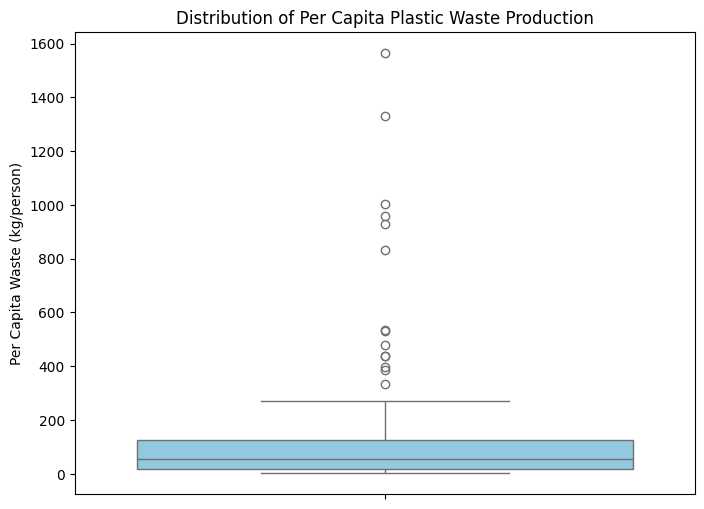

In [29]:
plot_per_capita_waste_distribution(plastic_pollution_data)

In [36]:
# Pie Chart for Coastal Waste Risk Levels
def plot_coastal_waste_risk_distribution(data):
    """
    Plots a pie chart to show the distribution of coastal waste risk levels.
    Args:
    data (pd.DataFrame): The dataset to plot.
    """
    # Count the occurrences of each risk level
    risk_counts = data['Coastal_Waste_Risk'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99', '#fdff99'])
    plt.title('Distribution of Coastal Waste Risk Levels')
    plt.show()

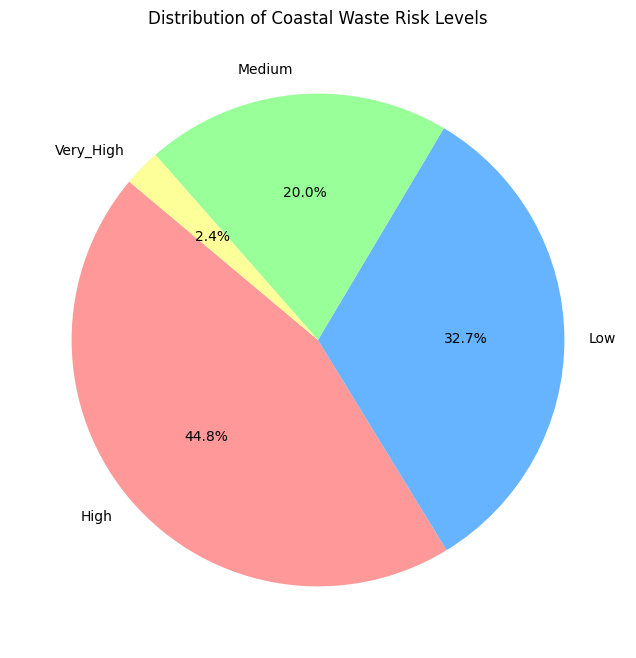

In [37]:
plot_coastal_waste_risk_distribution(plastic_pollution_data)